# About the comapny

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

# Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# Let us Start!

In [20]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the training and test datafile

train=pd.read_csv('C:\\Users\\User-1\\Downloads\\train_lp.csv')
train['LoanAmount']=train['LoanAmount']*1000
test=pd.read_csv('C:\\Users\\User-1\\Downloads\\test_.csv')
test['LoanAmount']=test['LoanAmount']*1000

#Printing first 5 rows of training file

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [21]:
#To study descriptive statistics of our data

train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001776,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146412.162162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85587.325236,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9000.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100000.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128000.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168000.000000,360.00000,1.000000,NaN,NaN


Text(0, 0.5, 'Count')

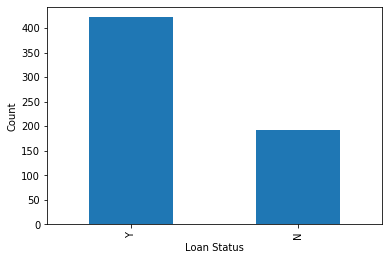

In [22]:
#Plotted the countplot of our target variable to check whether our data is proper or biased

train['Loan_Status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')

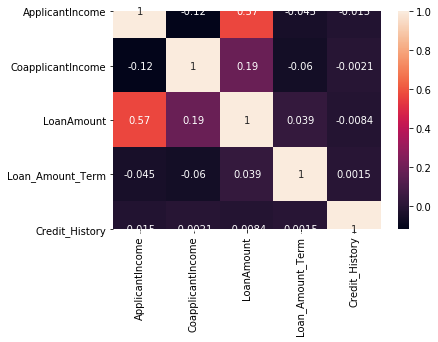

In [23]:
#Plotted the heatmap to check the corelation of numerical featurres

plt.figure()
sns.heatmap(train.corr(),annot=True)
plt.show()

In [24]:
#Since we know that Loan_Amount_Term and Credit_History are also categorical features we have use this code instead of using dtypes for selecting categorical features

cat_features=[index for index in train.columns if len(train[index].unique())<15]
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

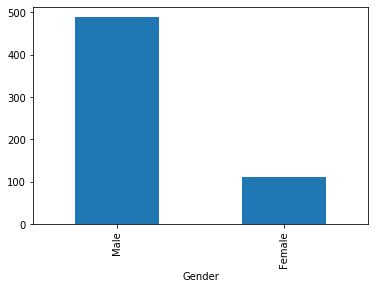

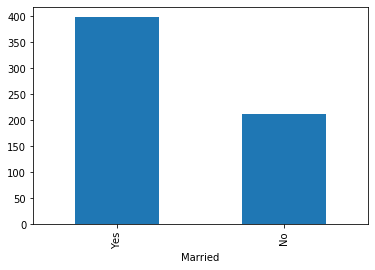

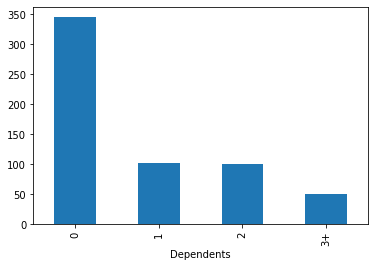

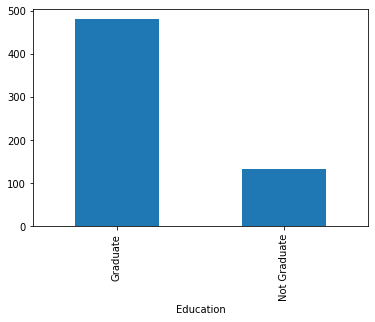

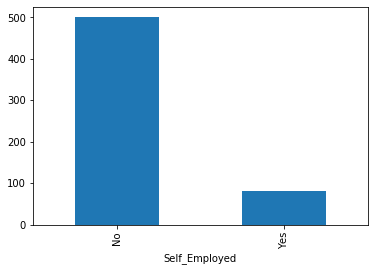

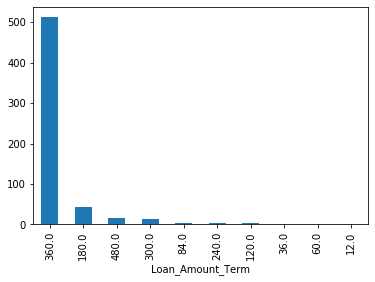

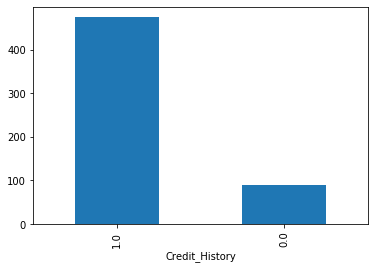

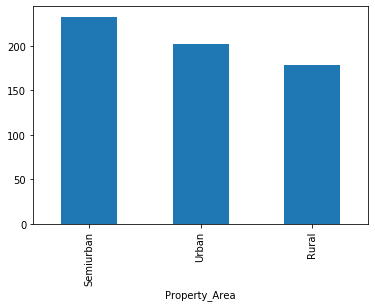

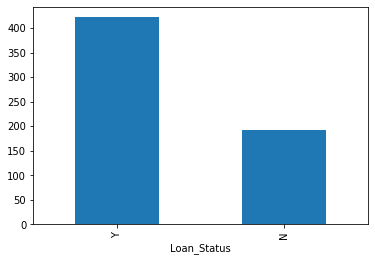

In [25]:
#Plotted varoius countplot for categorical feaures 

for cat in cat_features:
    train[cat].value_counts().plot(kind='bar')
    plt.xlabel(cat)
    plt.show()

In [26]:
#Defined the function to check the unique values 

def counts(feature):
    return train[feature].value_counts()
counts('Married')

Yes    398
No     213
Name: Married, dtype: int64

After analysing all features independents now we will see how differnt categorical features have their effect on our target variable loan status

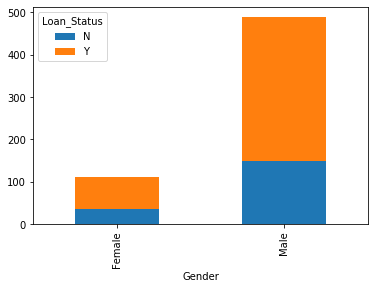

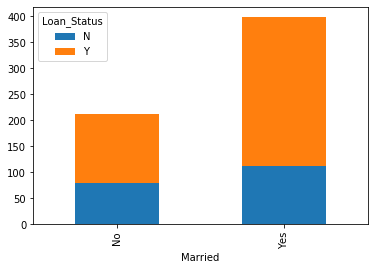

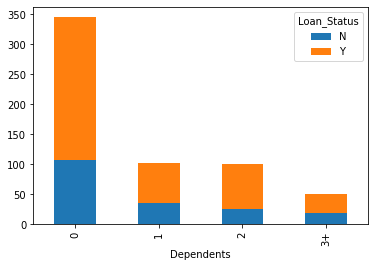

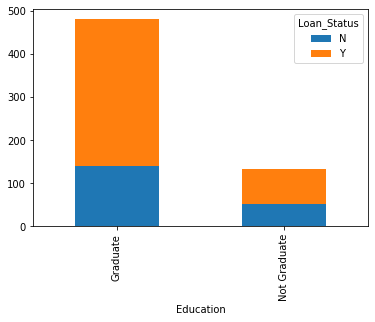

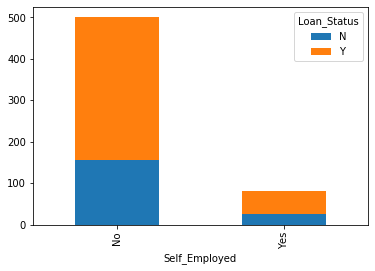

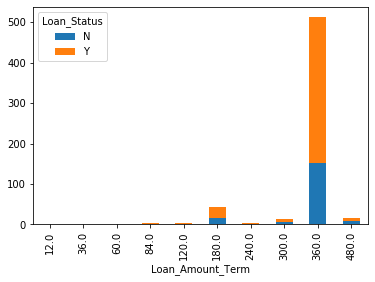

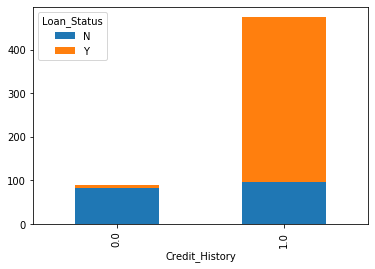

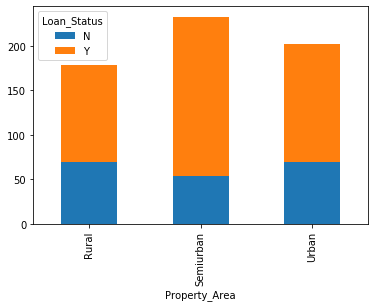

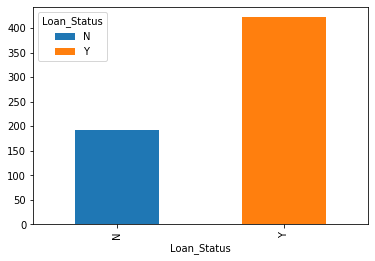

In [27]:
 for feature_x in cat_features:
        a=pd.crosstab(train[feature_x],train['Loan_Status'])
        a.plot(kind='bar',stacked=True)
        plt.show()

Graph 3-Distribution of applicants with 1 or 3+ dependents is similar across both categories of loan status.But applicant with 0 dependents have higher proportion of approved loans

Graph 1-Proportion of male and female applicant is more or less same for approved and not approved loan status But male has somewhat higher proportion of approved loans compared to female applicant

Graph 2-Proportion of married applicant is higher for approved loans


Graph 4-Generally applicants who apply for loan are graduates and proportion of graduate applicant is higher for approved loans

Graph 5-There is nothing significant that we can infer from graph of self employed vs loan status but there are are more no of appliacnt who are unemployed and they apply for loan.and proportion of unemployed applicant as well as employed applicant is higher for approved loans 

Graph-7 It seems like people with credit history as 1 are more likely to get their loans approved

Graph 8-Proportion of loans getting approved in semi urban areas is higher as compared to rural and urban area

In [28]:
#To check for the missing values

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As there is no stong correlation of these variables with any other variable so i decided to fill missing values either by their median value or mode value

In [29]:
#Fill the missing values

train['Dependents'].replace('3+','3',inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna('0',inplace=True)

#
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

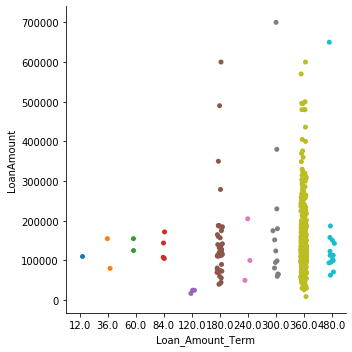

In [30]:
sns.catplot('Loan_Amount_Term','LoanAmount',data=train)

As we can see that there are many outliers in loan amount so it is better to fill missing values with the median or mode 

In [31]:

train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

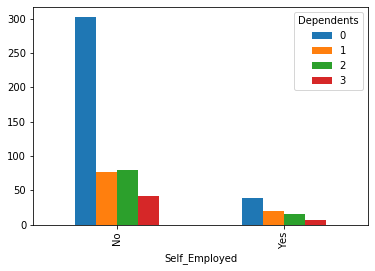

In [32]:
a=pd.crosstab(train['Self_Employed'],train['Dependents'])
a.plot(kind='bar')
plt.show()

Form the bar plot of dependents vs self_employed it can be observed that if there are 0 dependents around 270 of them are unemployed out of 345.


0 Dependents also means that no one in his family is dependent on his/her income so one possibililty is that he/she is still studying

But at the end of the day  90 % values of self employed corresponds to 'No' so we will fill the missing values with no.

In [33]:
train['Self_Employed'].fillna('No',inplace=True)

I decided to fill missing values of credit history with 2 since null values in credit history signifies that applicant had not borrowd any loan previously

In [34]:
train['Credit_History'].fillna(2,inplace=True)

We shall fill missing values of Credit_History with 2 , since : -

0 stands for applicants who took a Loan in the past but could not repay the Loan , due to different factors

1 stands for applicants who took a Loan in the past and have repayed the Loan generously

2 stands for applicants who are basically , the First Timers (Never - ever took a Loan)

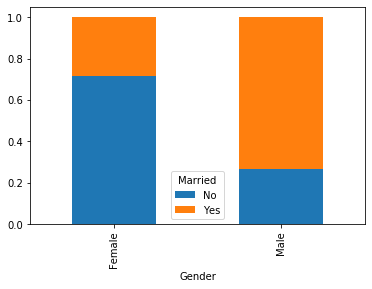

In [35]:
a=pd.crosstab(train['Gender'],train['Married'])
a.div(a.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.show()

None of the graph are able to depict as to what gender should be but looking at thi plot one can clearly say that counts of Female being married is really low

In [36]:
dict={'Yes':'Male','No':'Female'}
train['Gender'].fillna(train['Married'].map(dict),inplace=True)

In [37]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After analyzing categorical features now we will look at our continuous variable and plot their histogram and boxplot to check the skewness and to identify the outliers present in our continuous variable

### Histograms

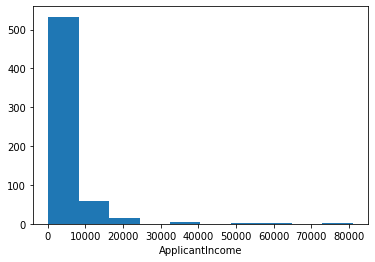

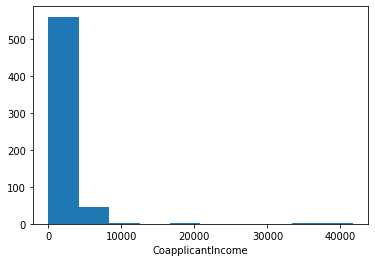

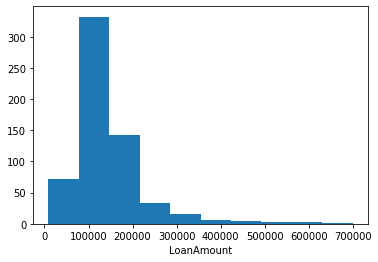

In [38]:

features=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in features:
    plt.hist(train[i],bins=10)
    plt.xlabel(i)
    plt.show()

The above histograms are positively skewed so in order to remove the skewness we will do log transformation

In [39]:
train['log_appincome']=np.log(train['ApplicantIncome'])
train['sqrt_coappincome']=np.sqrt(train['CoapplicantIncome'])

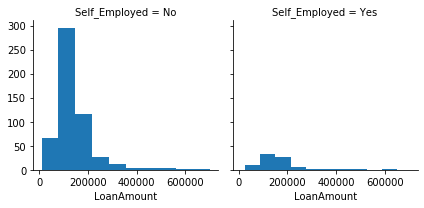

In [40]:
g=sns.FacetGrid(train,col='Self_Employed')
g.map(plt.hist,'LoanAmount',bins=10)

### Boxplots

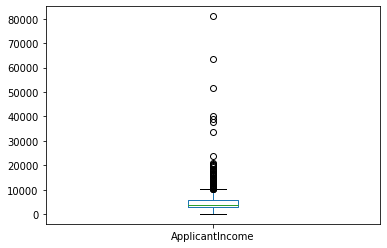

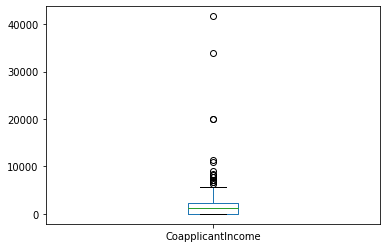

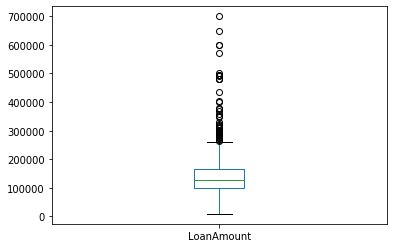

In [41]:
feature=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in feature:
    plt.figure()
    train[i].plot(kind='box')
    plt.show()

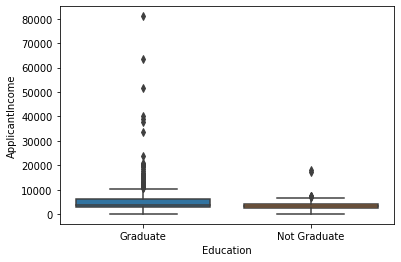

In [42]:
def boxplot(feature,basis):
    return sns.boxplot(train[feature],train[basis])
boxplot('Education','ApplicantIncome')

I've tried to make a function which can plot any graph amongst boxplot,barplot,catplot which is important for this dataset and i have missed . Instead of making many graph and rejecting it if it is not useful,function can plot all types of graph by writing just one line of code.

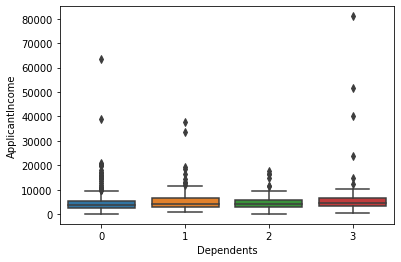

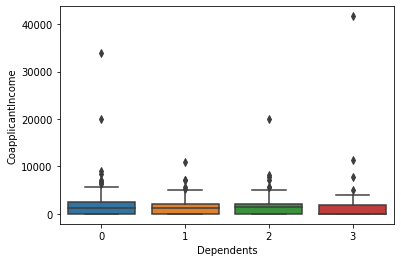

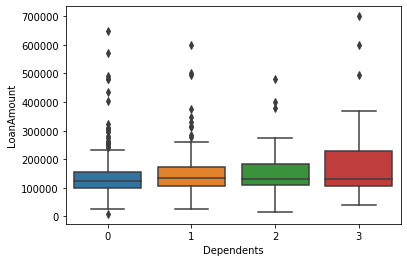

In [43]:
feature=['ApplicantIncome','CoapplicantIncome','LoanAmount']
def plot_graph(x_axis_feature,type_of_graph,hue=None):
    for i in feature:
        if (type_of_graph=='boxplot'):
            sns.boxplot(x_axis_feature,i,hue=hue,data=train)
            plt.show()
        elif (type_of_graph=='barplot'):
             sns.barplot(x_axis_feature,i,data=train)
             plt.show()
        elif (type_of_graph=='catplot'):
             sns.barplot(x_axis_feature,i,hue=hue,data=train)
             plt.show()
plot_graph('Dependents','boxplot')

From above graph it is clearly visible that applicant having more no of dependents apply for more loan amount and they also have higher source of income

### Removing the outliers

Interquartile Range (IQR) is important because it is used to define the outliers. It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

If data distribution is approx normal then about 68% values lie within one standard deviation of mean and about 95% lie within two standard deviation and about 99.7% values lie within three standard deviation.
Therefore, if you have any data point that is more than 3 times standard deviation then those points are likely to be considered as outlier



In [44]:
#Removing outliers with the help of z score

def remove_outlier(column):
    std=np.std(train[column])
    mean=np.mean(train[column])
    outlier=[]
    for i in train[column]:
        zscore=(i-mean)/std
        
        #Considering z>3 because z>3 sinifies 99.7%values fall in that region
        
        if(zscore>3):
            outlier.append(i)
            minimum=np.min(outlier)
    return minimum

In [45]:
print(remove_outlier('ApplicantIncome'))
print(remove_outlier('CoapplicantIncome'))
print(remove_outlier('LoanAmount'))

23803
10968.0
400000.0


In [46]:
train['ApplicantIncome']=train['ApplicantIncome'].where(train['ApplicantIncome']<23803,train['ApplicantIncome'].median())
train['CoapplicantIncome']=train['CoapplicantIncome'].where(train['CoapplicantIncome']<10968,train['CoapplicantIncome'].median())
train['LoanAmount']=train['LoanAmount'].where(train['LoanAmount']<400000,train['LoanAmount'].median())

In [47]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_appincome,sqrt_coappincome
count,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4849.527687,1408.47544,136205.211726,342.410423,0.936482,8.341213,28.006444
std,3369.960378,1677.16081,58406.129191,64.428629,0.471924,0.645263,28.952550
min,150.000000,0.00000,9000.000000,12.000000,0.000000,5.010635,0.000000
25%,2877.500000,0.00000,100250.000000,360.000000,1.000000,7.964677,0.000000
50%,3812.250000,1177.75000,128000.000000,360.000000,1.000000,8.246040,34.473218
75%,5690.500000,2250.00000,160000.000000,360.000000,1.000000,8.664750,47.929559
max,20833.000000,8980.00000,380000.000000,480.000000,2.000000,11.302204,204.124962


### Feature Engineering

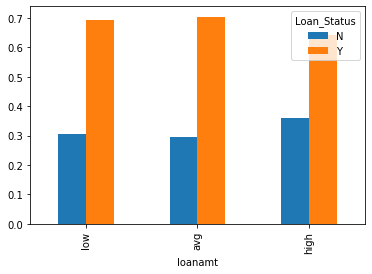

In [48]:
train['loanamt']=pd.cut(train['LoanAmount'],bins=[8999,100250,160000,380001],labels=['low','avg','high'])
a=pd.crosstab(train['loanamt'],train['Loan_Status'])
a.div(a.sum(1),axis=0).plot(kind='bar')
plt.show()

From above graph it can be concluded that if the loan amount is less than chances of loan getting approved is higher

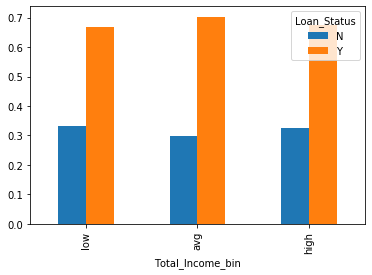

In [49]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins=[1441,3997.5,7165,27501],labels=['low','avg','high'])
a=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
a.div(a.sum(1),axis=0).plot(kind='bar')
plt.show()

In [50]:
def set_scr(train):
    if train["Total_Income_bin"] == "low" and train["loanamt"] == "high":
        return 1
    elif train["Total_Income_bin"] == "avg" and train["loanamt"] == "high":
        return 2
    elif train["Total_Income_bin"] == "low" and train["loanamt"] == "avg":
        return 4
    elif train["Total_Income_bin"] == "high" and train["loanamt"] == "high":
        return 8
    elif train["Total_Income_bin"] == "avg" and train["loanamt"] == "avg":
        return 7
    elif train["Total_Income_bin"] == "low" and train["loanamt"] == "low":
        return 3
    elif train["Total_Income_bin"] == "high" and train["loanamt"] == "avg":
        return 6
    elif train["Total_Income_bin"] == "avg" and train["loanamt"] == "low":
        return 5
    else :
        return 9
train['score']=train.apply(set_scr,axis=1)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_appincome,sqrt_coappincome,loanamt,Total_Income,Total_Income_bin,score
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128000.0,360.0,1.0,Urban,Y,8.674026,0.000000,avg,5849.0,avg,7
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128000.0,360.0,1.0,Rural,N,8.430109,38.832976,avg,6091.0,avg,7
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000.0,360.0,1.0,Urban,Y,8.006368,0.000000,low,3000.0,low,3
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000.0,360.0,1.0,Urban,Y,7.856707,48.559242,avg,4941.0,avg,7
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141000.0,360.0,1.0,Urban,Y,8.699515,0.000000,avg,6000.0,avg,7


Previously we had given the score from 1 to 9 following the general trend bu when we studied the behaviour of our bank we came to know that our bank follows diff trend to give loan so we manipulated the credit score

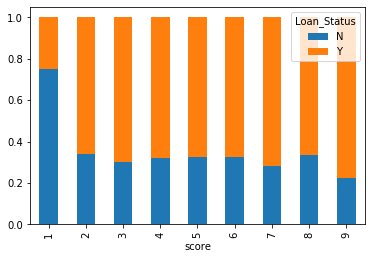

In [51]:
a=pd.crosstab(train['score'],train['Loan_Status'])
a.div(a.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.show()

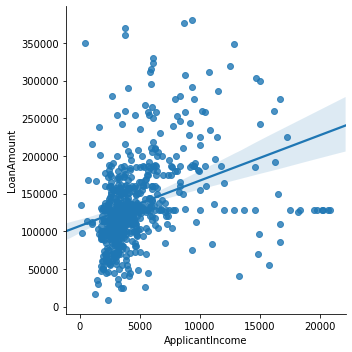

In [52]:
sns.lmplot('ApplicantIncome','LoanAmount',data=train)

Above graph shows the positive correlation between loanamount and applicantincome.

As ApplicantIncome increases loanamount also increases

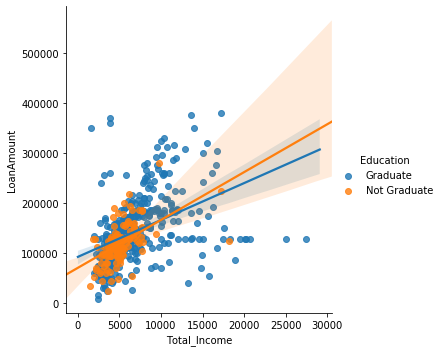

In [53]:
sns.lmplot('Total_Income','LoanAmount',data=train,hue='Education')

In [54]:
#I've calculated EMI that every person will pa eah and every month
train['EMI']=(train['LoanAmount']*(7.85/1200)*((1+(7.85/1200))**train['Loan_Amount_Term']))/((1+(7.85/1200))**(train['Loan_Amount_Term']-1))
#Now we will calculate Risk factor
train['Risk_Percent']=(train['EMI']/train['ApplicantIncome'])


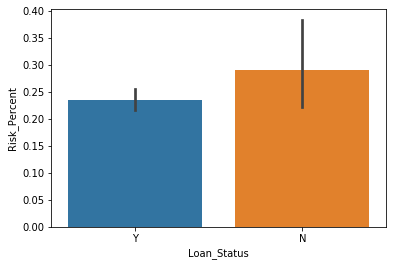

In [55]:
sns.barplot('Loan_Status','Risk_Percent',data=train)

Above graph clearly signifies that there is high risk percent for loan status of no.

So if there is high risk percent chances of loan approval is low

In [56]:
train['Risk_Percent_bin']=pd.cut(train['Risk_Percent'],bins=[0.019859,0.153936,0.204763,0.281542,5.926015],labels=[0,1,2,3])

0 - Very low risk

1 - Low risk

2 - High risk

3 - Very high risk

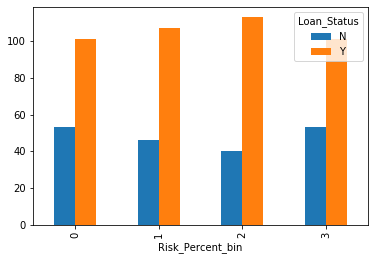

In [57]:
a=pd.crosstab(train['Risk_Percent_bin'],train['Loan_Status'])
a.plot(kind='bar')
plt.show()

Creating risk percent bin didnt justify our main aim as for high risk there are more chances for approvd loans

We have tried to make new columns which shows no of coapplicant based on coapplicant income

In [58]:
def num(train):
    if train['CoapplicantIncome']==0:
        return 0
    elif train['CoapplicantIncome']>=0 and train['CoapplicantIncome']<=2250:
        return 1
    elif train['CoapplicantIncome']>2250 and train['CoapplicantIncome']<=9000:
        return 2
train['coapplicant']=train.apply(num,axis=1)

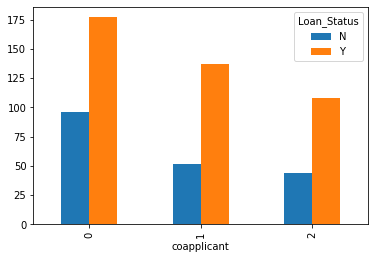

In [59]:
a=pd.crosstab(train['coapplicant'],train['Loan_Status'])
a.plot(kind='bar')
plt.show()

In [60]:
a

Loan_Status,N,Y
coapplicant,,
0,96,177
1,52,137
2,44,108


So if there are more no of coapplicant there is low chance that your loan will get rejected but that proportion of higher approved loans is not that significant for coapplicant 1 and 2

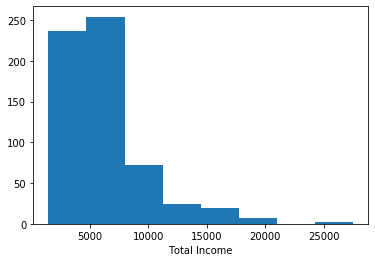

In [61]:
plt.hist(train['Total_Income'],bins=8)
plt.xlabel('Total Income')
plt.show()

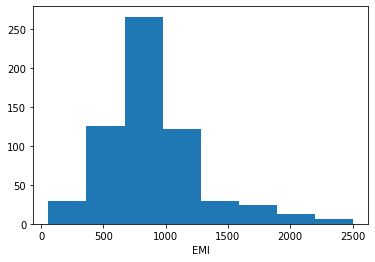

In [62]:
plt.hist(train['EMI'],bins=8)
plt.xlabel('EMI')
plt.show()

In [63]:
# So we also need to remove skewness from Total Income
train['log_total_income']=np.log(train['Total_Income'])

In [64]:
# As there are 650 zero's in coapplicantincome and we have craeted a new column total income so we can drop coapplicant income
train=train.drop(['CoapplicantIncome'],axis=1)

### Label Encoding

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
Loan_ID             614 non-null object
Gender              614 non-null object
Married             614 non-null object
Dependents          614 non-null object
Education           614 non-null object
Self_Employed       614 non-null object
ApplicantIncome     614 non-null float64
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Credit_History      614 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null object
log_appincome       614 non-null float64
sqrt_coappincome    614 non-null float64
loanamt             614 non-null category
Total_Income        614 non-null float64
Total_Income_bin    614 non-null category
score               614 non-null int64
EMI                 614 non-null float64
Risk_Percent        614 non-null float64
Risk_Percent_bin    614 non-null category
coapplicant         614 non-null int64
lo

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Gender']=le.fit_transform(train['Gender'])
train['Married']=le.fit_transform(train['Married'])

train['Self_Employed']=le.fit_transform(train['Self_Employed'])
train['Loan_Status']=le.fit_transform(train['Loan_Status'])
train['loanamt']=train['loanamt'].astype('object')
train['Total_Income_bin']=train['Total_Income_bin'].astype('object')
dict={'low':1,'avg':2,'high':3}
dict1={'low':1,'avg':2,'high':3}
dict2={'Graduate':1,'Not Graduate':0}
dict3={"Rural":0,'Urban':2,'Semiurban':1}
dict4={12:2,36:3,60:4,84:5,120:6,180:7,240:8,300:9,350:10,360:11,480:12}
train['Loan_Amount_Term']=train['Loan_Amount_Term'].map(dict4)
train['loanamt']=train['loanamt'].map(dict)
train['Education']=train['Education'].map(dict2)
train['Total_Income_bin']=train['Total_Income_bin'].map(dict1)
train['Property_Area']=train['Property_Area'].map(dict3)

In [67]:
pd.set_option('display.max_columns',None)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_appincome,sqrt_coappincome,loanamt,Total_Income,Total_Income_bin,score,EMI,Risk_Percent,Risk_Percent_bin,coapplicant,log_total_income
0,LP001002,1,0,0,1,0,5849.0,128000.0,11,1.0,2,1,8.674026,0.000000,2,5849.0,2,7,842.810889,0.144095,0,0,8.674026
1,LP001003,1,1,1,1,0,4583.0,128000.0,11,1.0,0,0,8.430109,38.832976,2,6091.0,2,7,842.810889,0.183899,1,1,8.714568
2,LP001005,1,1,0,1,1,3000.0,66000.0,11,1.0,2,1,8.006368,0.000000,1,3000.0,1,3,434.574365,0.144858,0,0,8.006368
3,LP001006,1,1,0,0,0,2583.0,120000.0,11,1.0,2,1,7.856707,48.559242,2,4941.0,2,7,790.135208,0.305898,3,2,8.505323
4,LP001008,1,0,0,1,0,6000.0,141000.0,11,1.0,2,1,8.699515,0.000000,2,6000.0,2,7,928.408870,0.154735,1,0,8.699515


# Feature Selection

In [68]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status', 'log_appincome',
       'sqrt_coappincome', 'loanamt', 'Total_Income', 'Total_Income_bin',
       'score', 'EMI', 'Risk_Percent', 'Risk_Percent_bin', 'coapplicant',
       'log_total_income'],
      dtype='object')

In [69]:
X=train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'log_appincome', 'sqrt_coappincome', 'loanamt',
       'Total_Income', 'Total_Income_bin', 'score', 'EMI', 'Risk_Percent','Risk_Percent_bin','log_total_income','coapplicant']]
y=train[['Loan_Status']]
X1=train[['loanamt','Total_Income_bin','score','Gender','Married','Dependents','Education','Self_Employed','Property_Area','coapplicant']]

### Performing train test split


Using train test split to create training set and validation set

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=31,test_size=0.2)

### Standard scaling on training and testing data

Standardisation is a scaling technique where the values are centred around mean with a unit standard deviation and mean of attributed becomes zero.

Normalisation is good to use when we do not have gaussian distribution but generally normalization is used for models like knn and neural network.In general we use standadisation since it is not affected by outliers and it works better compared to normalisation.At the end of the day we use scaling technique which works better.

It is good practice to fit scaler on training data and then use it to transform testing data to avoid data leakage

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['ApplicantIncome','LoanAmount','Total_Income','EMI','log_appincome','Risk_Percent','sqrt_coappincome','log_total_income']]=scaler.fit_transform(X_train[['ApplicantIncome','LoanAmount','Total_Income','EMI','log_appincome','Risk_Percent','sqrt_coappincome','log_total_income']])
X_test[['ApplicantIncome','LoanAmount','Total_Income','EMI','log_appincome','Risk_Percent','sqrt_coappincome','log_total_income']]=scaler.transform(X_test[['ApplicantIncome','LoanAmount','Total_Income','EMI','log_appincome','Risk_Percent','sqrt_coappincome','log_total_income']])

C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User-1\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

## Univariate Feature Selection Methods

In [72]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=31)
from sklearn.ensemble import RandomForestClassifier
log=RandomForestClassifier(random_state=31)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=31)
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=31)
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=31)
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(AdaBoostClassifier(random_state=31))
from mlxtend.classifier import StackingClassifier
scc=StackingClassifier(classifiers=[gbc],meta_classifier=abc)
from sklearn.svm import SVC
svc=SVC(random_state=31)
from sklearn.naive_bayes  import GaussianNB
gb=GaussianNB()

## Filter Methods

Pearson’s Correlation: It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson’s correlation is given as:
fs2

LDA: Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.

ANOVA: ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.

Chi-Square: It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.

One thing that should be kept in mind is that filter methods do not remove multicollinearity. So, you must deal with multicollinearity of features as well before training models for your data.

### Anova Test

In [73]:
from sklearn.feature_selection import chi2,f_classif
sel=f_classif(X_train,y_train)
p=pd.Series(sel[1])
p.index=X_train.columns
p=p[p<0.05]
p

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Married           2.607922e-02
LoanAmount        1.419503e-02
Credit_History    4.763212e-21
EMI               1.419503e-02
dtype: float64

### Chi Square Test

In [74]:
from sklearn.feature_selection import chi2
sel=chi2(X1,y)
pv=pd.Series(sel[1])
pv.index=X1.columns

pv

loanamt             0.629250
Total_Income_bin    0.950917
score               0.349414
Gender              0.843905
Married             0.181852
Dependents          0.769387
Education           0.320136
Self_Employed       0.931982
Property_Area       0.538763
coapplicant         0.168850
dtype: float64

In [75]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
sel=SelectFromModel(LogisticRegression(penalty='l1',C=0.05,solver='liblinear'))
sel.fit(X_train,y_train)
X_train.columns[sel.get_support()]

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'EMI'], dtype='object')

In [76]:
from sklearn.feature_selection import SelectPercentile , mutual_info_classif
sel=SelectPercentile(mutual_info_classif,percentile=10).fit(X_train,y_train)
X_train.columns[sel.get_support()]

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Index(['Credit_History', 'loanamt'], dtype='object')

In [77]:
corr_features=set()
corr_matrix=train.corr()
for i in range(len(corr_matrix.columns)):
    for j in range (i):
        if(abs(corr_matrix.iloc[i,j]>0.8)):
            corr_features.add(corr_matrix.columns[i])
corr_features

{'EMI',
 'Total_Income',
 'coapplicant',
 'loanamt',
 'log_appincome',
 'log_total_income'}

## Wraper Methods

Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Backward Elimination: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

Recursive Feature elimination: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [170]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
sfs=SFS(AdaBoostClassifier(random_state=31),
        k_features=5,
        forward= True,
        floating=False,
        verbose=2,
        cv=4,
        scoring='accuracy',
        n_jobs=-1
       
       ).fit(X_train,y_train)
sfs.k_feature_names_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    7.8s finished

[2020-07-05 08:42:39] Features: 1/5 -- score: 0.7983473277355724[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.6s finished

[2020-07-05 08:42:44] Features: 2/5 -- score: 0.8044448887111821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.9s finished

[2020-07-05 08:42:48] Features: 3/5 -- score: 0.806494069039051[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.8s finished

[2020-07-05 08:42:52] Features: 4/5 -- score: 0.8105591096894575[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    4.7s finished

[2020

('Loan_Amount_Term', 'Credit_History', 'loanamt', 'score', 'coapplicant')

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier
efs=EFS(LogisticRegression(random_state=31),
        max_features=5,
        min_features=4,
        cv = None,
        scoring='accuracy',
        n_jobs=-1
       
       ).fit(X_train,y_train)
efs.best_feature_names_

In [171]:
from sklearn.feature_selection import RFE
sel=RFE(AdaBoostClassifier(random_state=31),n_features_to_select=7)
sel.fit(X_train,y_train)
X_train.columns[sel.get_support()]

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

Index(['ApplicantIncome', 'log_appincome', 'sqrt_coappincome', 'Total_Income',
       'EMI', 'Risk_Percent', 'log_total_income'],
      dtype='object')

# Training the Model

I've written this for loop to make the task easier for any analyst.

We just have to dump all possible permutation of features in one list and names of the model in another list.
So the loop will run in such a way that for one combination of features it will give us the accuracy score of that list of features with all the models

In [83]:
x1=X_train.copy()
x2=X_test.copy()

With the help of the sample codes above , one can manipulate the parameters inside to get the following List

List 1 : Is a result of features that our initial training datafile had (feature engineering features excluded)

List 2 : Is a result of features that out training datafile has (feature engineering features included)

List 3 : Is a result of estimator = AdaBoostRegressor() in FFS

List 4 : Is a result of estimator = LogisticRegression() in FFS

List 5 : Is a result of estimator = GradientBoostingRegressor() in FFS

List 6 : Is a result of estimator = AdaBoostRegressor() in BFE

List 7 : Is a result of estimator = LogisticRegression() and n_features_to_select = 5 in RFE

List 8 : Is a result of List 9 (keeping only Net_Income) , out of which 1 correlated feature was removed

List 9 : Is a result of List 9 (keeping only log_Net_Income) , out of which 1 correlated feature was removed

List 10 : Is a result of estimator = AdaBoostRegressor() and cv=2 in EFS

List 11 : Is a result of estimator = AdaBoostRegressor() and cv=3 in EFS

In [78]:
# List of all possible sets of feature
li1=[['EMI','Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'log_appincome', 'sqrt_coappincome', 'loanamt',
       'Total_Income', 'Total_Income_bin', 'score', 'Risk_Percent','Risk_Percent_bin','log_total_income','coapplicant'],['Loan_Amount_Term','Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount',
     'Credit_History', 'Property_Area'],['Gender', 'Married', 'Dependents', 'Education', 'Credit_History'],['Married', 'Education', 'Self_Employed', 'Credit_History', 'loanamt'],['Education','Married', 'Credit_History', 'loanamt', 'coapplicant'],['score','Gender', 'Education', 'Credit_History', 'log_total_income'],['Married', 'LoanAmount', 'Credit_History', 'Total_Income_bin',
       'log_total_income'],['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Risk_Percent',
       'log_total_income'],['ApplicantIncome', 'Credit_History', 'EMI', 'Risk_Percent',
       'log_total_income'],['Loan_Amount_Term', 'Credit_History', 'loanamt', 'score', 'coapplicant'],['ApplicantIncome', 'log_appincome', 'Total_Income', 'EMI',
       'Risk_Percent'],['ApplicantIncome', 'Total_Income', 'Credit_History', 'Risk_Percent',
       'Gender'],['ApplicantIncome', 'Total_Income', 'Credit_History', 'Risk_Percent',
       'Dependents'],['LoanAmount','Loan_Amount_Term','Risk_Percent','Credit_History','sqrt_coappincome']]

In [79]:
ya=y_train['Loan_Status']
yb=y_test['Loan_Status']

In [80]:
# List of all models used for classification problem
li2=['Logistic','ada','stacking','DecisionTree','RandomForest','Gradient','Bagging','knn','svc','naive']

Okay , so we're ready with an all possible features list and models list . What Next ?

Lets think like this . What if we have a list 1 and we wish to try that list with each and every model type ? Think .. Think ! ! !

.......

Okay so a short , sweet and simple for loop would suffice . But, what if we have multiple lists and multiple models ?

Ahahahh ....You got that right ! Use 2 for loops !

Dont hesitate when you have a look at the code below . It's a pretty simple code (a function named get_models) that shall help us build a dataframe .

We've created some temporary files , that can help us overwrite data , in our for loop

In [84]:
row=[]
for i in li1:
    for j in li2:
        if j=='Logistic':
            X_train=X_train[i]
            X_test=X_test[i]
            logreg.fit(X_train,ya)
            final=logreg.predict(X_test)
            finall=logreg.predict(X_train)
            sub=(metrics.accuracy_score(yb,final)-metrics.accuracy_score(ya,finall))
            row.append([i,j,metrics.accuracy_score(yb,final),sub])
            X_train=x1
            X_test=x2
        elif j=='ada':
            X_train=X_train[i]
            X_test=X_test[i]
            abc.fit(X_train,ya)
            final1=abc.predict(X_test)
            final11=logreg.predict(X_train)
            sub=(metrics.accuracy_score(yb,final)-metrics.accuracy_score(ya,final11))
            row.append([i,j,metrics.accuracy_score(yb,final1),sub])
            X_train=x1
            X_test=x2
        elif j=='stacking':
            X_train=X_train[i]
            X_test=X_test[i]
            scc.fit(X_train,ya)
            final2=scc.predict(X_test)
            final22=logreg.predict(X_train)
            sub=(metrics.accuracy_score(yb,final)-metrics.accuracy_score(ya,final22))
            row.append([i,j,metrics.accuracy_score(yb,final2),sub])
            X_train=x1
            X_test=x2
        elif j=='DecisionTree':
            X_train=X_train[i]
            X_test=X_test[i]
            dtc.fit(X_train,ya)
            final3=dtc.predict(X_test)
            final33=logreg.predict(X_train)
            sub=(metrics.accuracy_score(yb,final)-metrics.accuracy_score(ya,final33))
            row.append([i,j,metrics.accuracy_score(yb,final3),sub])
            X_train=x1
            X_test=x2
        elif j=='RandomForest':
            X_train=X_train[i]
            X_test=X_test[i]
            log.fit(X_train,ya)
            final4=log.predict(X_test)
            final44=logreg.predict(X_train)
            sub=(metrics.accuracy_score(yb,final)-metrics.accuracy_score(ya,final44))
            row.append([i,j,metrics.accuracy_score(yb,final4),sub])
            X_train=x1
            X_test=x2
        elif j=='Gradient':
            X_train=X_train[i]
            X_test=X_test[i]
            gbc.fit(X_train,ya)
            final5=gbc.predict(X_test)
            final55=logreg.predict(X_train)
            sub=(metrics.accuracy_score(yb,final)-metrics.accuracy_score(ya,final55))
            row.append([i,j,metrics.accuracy_score(yb,final5),sub])
            X_train=x1
            X_test=x2
        elif j=='Bagging':
            X_train=X_train[i]
            X_test=X_test[i]
            bc.fit(X_train,ya)
            final6=bc.predict(X_test)
            final66=logreg.predict(X_train)
            sub=(metrics.accuracy_score(yb,final)-metrics.accuracy_score(ya,final66))
            row.append([i,j,metrics.accuracy_score(yb,final6),sub])
            X_train=x1
            X_test=x2
        elif j=='knn':
            X_train=X_train[i]
            X_test=X_test[i]
            knn.fit(X_train,ya)
            final7=knn.predict(X_test)
            final77=logreg.predict(X_train)
            sub=(metrics.accuracy_score(yb,final)-metrics.accuracy_score(ya,final77))
            row.append([i,j,metrics.accuracy_score(yb,final7),sub])
            X_train=x1
            X_test=x2
        elif j=='svc':
            X_train=X_train[i]
            X_test=X_test[i]
            svc.fit(X_train,ya)
            final8=svc.predict(X_test)
            final88=logreg.predict(X_train)
            sub=(metrics.accuracy_score(yb,final)-metrics.accuracy_score(ya,final88))
            row.append([i,j,metrics.accuracy_score(yb,final8),sub])
            X_train=x1
            X_test=x2
        elif j=='naive':
            X_train=X_train[i]
            X_test=X_test[i]
            gb.fit(X_train,ya)
            final9=gb.predict(X_test)
            final99=logreg.predict(X_train)
            sub=(metrics.accuracy_score(yb,final)-metrics.accuracy_score(ya,final99))
            row.append([i,j,metrics.accuracy_score(yb,final9),sub])
            X_train=x1
            X_test=x2

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
df=pd.DataFrame(row,columns=['Features','model','score','sub'])
df=df.sort_values(by=['sub'],ascending=True)
df.head(10)
#df.iloc[111]['Features']

,Features,model,score,sub
101,"[ApplicantIncome, log_appincome, Total_Income,...",ada,0.691057,0.020963
102,"[ApplicantIncome, log_appincome, Total_Income,...",stacking,0.666667,0.020963
103,"[ApplicantIncome, log_appincome, Total_Income,...",DecisionTree,0.544715,0.020963
104,"[ApplicantIncome, log_appincome, Total_Income,...",RandomForest,0.585366,0.020963
105,"[ApplicantIncome, log_appincome, Total_Income,...",Gradient,0.666667,0.020963
100,"[ApplicantIncome, log_appincome, Total_Income,...",Logistic,0.707317,0.020963
107,"[ApplicantIncome, log_appincome, Total_Income,...",knn,0.715447,0.020963
108,"[ApplicantIncome, log_appincome, Total_Income,...",svc,0.723577,0.020963
109,"[ApplicantIncome, log_appincome, Total_Income,...",naive,0.682927,0.020963
106,"[ApplicantIncome, log_appincome, Total_Income,...",Bagging,0.691057,0.020963


I've written this for loop to make the task easier for any analyst.

We just have to dump all possible permutation of features in one list and names of the model in another list.
So the loop will run in such a way that for one combination of features it will give us the accuracy score of that list of features with all the models

In [89]:
from imblearn.under_sampling import RandomUnderSampler

As our dataset has yes to no ratio of 80% is to 20% so i thought of doing undersampling and oversampling.

Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.

Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

In [90]:
undersample=RandomUnderSampler(sampling_strategy='majority')
undersample=RandomUnderSampler(sampling_strategy=1)

In [91]:
Xa=X_train[['ApplicantIncome', 'Total_Income', 'Credit_History', 'Risk_Percent']]
Xb=X_test[['ApplicantIncome', 'Total_Income', 'Credit_History', 'Risk_Percent']]
Xaa,yaa = undersample.fit_resample(Xa,ya)

But we are not getting any better result after doing this since this technique is efficient for dataset having yes to no ratio ver less . 

for example 100:1,1000:1

# KNeighborsClassifier

In [174]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(Xa,ya)
pred0=knn.predict(Xb)
from sklearn import metrics
print(metrics.classification_report(yb,pred0))
print(metrics.confusion_matrix(yb,pred0))

              precision    recall  f1-score   support

           0       1.00      0.21      0.34        34
           1       0.77      1.00      0.87        89

    accuracy                           0.78       123
   macro avg       0.88      0.60      0.60       123
weighted avg       0.83      0.78      0.72       123

[[ 7 27]
 [ 0 89]]


In [175]:
from sklearn.preprocessing import binarize
y_prob=knn.predict_proba(Xb)[:,1]

print(metrics.confusion_matrix(yb,pred0))

[[ 7 27]
 [ 0 89]]


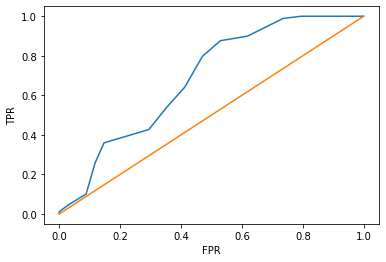

In [176]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(yb,y_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [75]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,Xa,ya,cv=10,scoring='accuracy')
score.mean()

0.6843265306122449

In [76]:
from sklearn.model_selection import GridSearchCV
k_range=range(1,31)
weight_option=['uniform','distance']
param_grid = {'n_neighbors':k_range , 'weights':weight_option}
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(Xa,ya)
print(grid.best_score_)
print(grid.best_params_)

0.735265306122449
{'n_neighbors': 14, 'weights': 'uniform'}


# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=1,multi_class='auto',solver='newton-cg',penalty='l2')
logreg.fit(Xa,ya)
pred1=logreg.predict(Xb)
print(metrics.classification_report(yb,pred1))
print(metrics.confusion_matrix(yb,pred1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        34
           1       0.84      1.00      0.91        89

    accuracy                           0.86       123
   macro avg       0.92      0.75      0.79       123
weighted avg       0.88      0.86      0.84       123

[[17 17]
 [ 0 89]]


In [78]:
y_prob=logreg.predict_proba(Xb)[:,1]
pred1=binarize([y_prob],0.50)[0]
print(metrics.confusion_matrix(yb,pred1))

[[17 17]
 [ 0 89]]


C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [79]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,Xa,ya,cv=10,scoring='accuracy')
score.mean()

0.7963673469387755

In [224]:
state=np.arange(1,50,1)
option=['auto','ovr']
weight_option=['newton-cg','lbfgs','liblinear','sag','saga']
param_grid = {'multi_class': option , 'solver':weight_option,'penalty':['l2']}
grid=GridSearchCV(logreg,param_grid,cv=10,scoring='accuracy')
grid.fit(Xa,ya)
print(grid.best_score_)
print(grid.best_params_)

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did 

0.7983706720977597
{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did 

# RandomForestClassifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
log=RandomForestClassifier(random_state=5)
log.fit(Xa,ya)
pred2=log.predict(Xb)
print(metrics.classification_report(yb,pred2))
print(metrics.confusion_matrix(yb,pred2))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        34
           1       0.85      0.85      0.85        89

    accuracy                           0.79       123
   macro avg       0.74      0.74      0.74       123
weighted avg       0.79      0.79      0.79       123

[[21 13]
 [13 76]]


In [81]:
y_prob=log.predict_proba(Xb)[:,1]
pred2=binarize([y_prob],0.60)[0]
print(metrics.confusion_matrix(yb,pred2))

[[22 12]
 [17 72]]


C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [77]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(log,Xa,ya,cv=10,scoring='accuracy')
score.mean()

0.7594676870748299

# DecisionTreeClassifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0,splitter='random',max_features='auto')
dtc.fit(Xa,ya)
pred3=dtc.predict(Xb)
print(metrics.accuracy_score(yb,pred3))
print(metrics.confusion_matrix(yb,pred3))

0.7154471544715447
[[20 14]
 [21 68]]


In [83]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,Xa,ya,cv=10,scoring='accuracy')
score.mean()

0.6905306122448979

In [84]:
option=['gini','entropy']
weight_option=['auto','sqrt','log2']
param_grid = {'criterion': option , 'max_features':weight_option,'splitter':['best','random']}
grid=GridSearchCV(dtc,param_grid,cv=10,scoring='accuracy')
grid.fit(Xa,ya)
print(grid.best_score_)
print(grid.best_params_)

0.7169795918367348
{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}


# GradientBoostingClassifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=31)
gbc.fit(Xa,ya)
pred4=gbc.predict(Xb)
print(metrics.classification_report(yb,pred4))
print(metrics.confusion_matrix(yb,pred4))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66        34
           1       0.85      0.92      0.89        89

    accuracy                           0.83       123
   macro avg       0.80      0.75      0.77       123
weighted avg       0.82      0.83      0.82       123

[[20 14]
 [ 7 82]]


In [178]:
y_prob=gbc.predict_proba(Xb)[:,1]
pred4=binarize([y_prob],0.55)[0]
print(metrics.confusion_matrix(yb,pred4))

[[19 15]
 [10 79]]


C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.55 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [179]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,Xa,ya,cv=10,scoring='accuracy')
score.mean()

0.6843265306122449

In [ ]:
param_grid = {'criterion':['friedman_mse','mse','mae'] , 'loss':['deviance','exponential'],'max_features':['auto','sqrt','log2'],'learning_rate':[0.1,0.01,0.001,1]}
grid=GridSearchCV(gbc,param_grid,cv=10,scoring='accuracy')
grid.fit(Xa,ya)
print(grid.best_score_)
print(grid.best_params_)

# AdaBoostClassifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=0,algorithm='SAMME',n_estimators=1000,learning_rate=0.1)
abc.fit(Xa,ya)
pred5=abc.predict(Xb)
print(metrics.classification_report(yb,pred5))
print(metrics.confusion_matrix(yb,pred5))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        34
           1       0.85      1.00      0.92        89

    accuracy                           0.87       123
   macro avg       0.92      0.76      0.80       123
weighted avg       0.89      0.87      0.86       123

[[18 16]
 [ 0 89]]


Total_Income       0.309481
Credit_History     0.283346
ApplicantIncome    0.273257
Risk_Percent       0.133915
dtype: float64

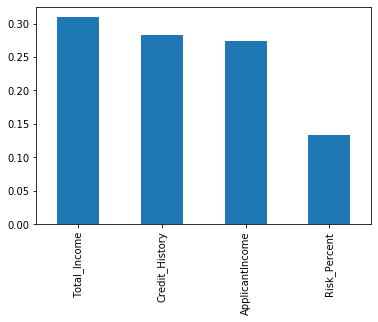

In [73]:
best=pd.Series(abc.feature_importances_,index=Xa.columns)
best.nlargest(7).plot(kind='bar')
best.nlargest(7)

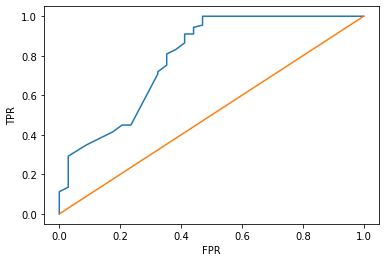

In [75]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(yb,y_prob5)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

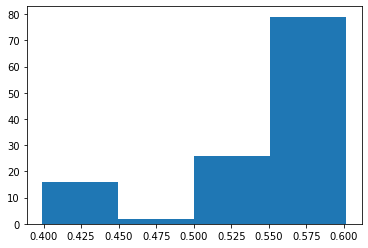

In [76]:
plt.hist(y_prob5,bins=4)
plt.show()

In [89]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(abc,Xa,ya,cv=10,scoring='accuracy')
score.mean()

0.7984489795918368

In [120]:
param_grid = {'algorithm':['SAMME','SAMME.R'] ,'n_estimators':[10,100,1000,50],'learning_rate':[0.1,0.01,0.001,1]}
grid=GridSearchCV(abc,param_grid,cv=10,scoring='accuracy')
grid.fit(Xa,ya)
print(grid.best_score_)
print(grid.best_params_)

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8004073319755601
{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 1000}


# BaggingClassifier

In [90]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(AdaBoostClassifier(random_state=0,algorithm='SAMME',n_estimators=10,learning_rate=0.1))
bc.fit(Xa,ya)
pred6=bc.predict(Xb)
print(metrics.accuracy_score(yb,pred6))

0.8536585365853658


In [91]:
from sklearn.preprocessing import binarize
y_prob=bc.predict_proba(Xb)[:,1]
pred6=binarize([y_prob],0.50)[0]

print(metrics.confusion_matrix(yb,pred6))

[[16 18]
 [ 0 89]]


C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


# Stacking Classifier

In [92]:
from mlxtend.classifier import StackingClassifier
scc=StackingClassifier(classifiers=[gbc],meta_classifier=logreg)
scc.fit(Xa,ya)
pred7=scc.predict(Xb)
print(metrics.accuracy_score(yb,pred7))

0.8536585365853658


In [93]:
y_prob=scc.predict_proba(Xb)[:,1]
pred7=binarize([y_prob],0.55)[0]

print(metrics.confusion_matrix(yb,pred7))

[[18 16]
 [ 2 87]]


C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.55 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


# Support Vector Machine

In [94]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(Xa,ya)
pred8=svc.predict(Xb)
print(metrics.classification_report(yb,pred8))
print(metrics.confusion_matrix(yb,pred8))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        34
           1       0.84      1.00      0.91        89

    accuracy                           0.86       123
   macro avg       0.92      0.75      0.79       123
weighted avg       0.88      0.86      0.84       123

[[17 17]
 [ 0 89]]


# Naive Bayes

In [95]:
from sklearn.naive_bayes  import GaussianNB
gb=GaussianNB()
gb.fit(Xa,ya)
pred9=gb.predict(Xb)
print(metrics.classification_report(yb,pred9))
print(metrics.confusion_matrix(yb,pred9))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67        34
           1       0.84      0.98      0.91        89

    accuracy                           0.85       123
   macro avg       0.87      0.75      0.79       123
weighted avg       0.86      0.85      0.84       123

[[18 16]
 [ 2 87]]


We tried submitting our results with many different combinations , as shown by our dataframe

And....

Here is our best list and the best model

As you may notice , we've got the best result when our model type is Gradient Boosting and List type is : 1

##### Reason why we selected this model is  In banking sector giving loans is primary source of money but at the same time your repayment rate is not good you will not make any money.

##### Banks dont wamt to lose good customers at the same time  they dont want to aquire bad customers so in this scenarion FP as well as FN are that important so we selected this model rather than selecting model having high FP and 0 FN

# Preparing testing dataset for final submission

In [180]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [181]:
dict={'Yes':'Male','No':'Female'}
test['Gender'].fillna(test['Married'].map(dict),inplace=True)

In [182]:
test['Credit_History'].fillna(2,inplace=True)

In [183]:
test['Self_Employed'].fillna('No',inplace=True)

In [184]:
test['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].fillna('0',inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [185]:
test['ApplicantIncome']=test['ApplicantIncome'].where(test['ApplicantIncome']>0,test['ApplicantIncome'].mean())

In [186]:
test['log_appincome']=np.log(test['ApplicantIncome'])
test['sqrt_coappincome']=np.sqrt(test['CoapplicantIncome'])

In [187]:
test['loanamt']=pd.cut(test['LoanAmount'],bins=[27000,101000,157500,560000],labels=['low','avg','high'])

In [188]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['Total_Income_bin']=pd.cut(test['Total_Income'],bins=[2082,4161.5,6980,72530],labels=['low','avg','high'])

In [189]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_appincome,sqrt_coappincome,Total_Income
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4831.788008,1569.577657,135980.926431,342.822888,0.918256,8.294887,28.206995,6401.365665
std,4897.749261,2334.232099,60959.739166,64.658402,0.483463,0.547110,27.857812,5244.153719
min,570.000000,0.000000,28000.000000,6.000000,0.000000,6.345636,0.000000,2083.000000
25%,2885.500000,0.000000,101000.000000,360.000000,1.000000,7.967447,0.000000,4161.500000
50%,3808.000000,1025.000000,125000.000000,360.000000,1.000000,8.244859,32.015621,5225.000000
75%,5060.000000,2430.500000,157500.000000,360.000000,1.000000,8.529122,49.299911,6980.000000
max,72529.000000,24000.000000,550000.000000,480.000000,2.000000,11.191742,154.919334,72529.000000


In [190]:
def set_scr(test):
    if test["Total_Income_bin"] == "low" and test["loanamt"] == "high":
        return 1
    elif test["Total_Income_bin"] == "avg" and test["loanamt"] == "high":
        return 2
    elif test["Total_Income_bin"] == "low" and test["loanamt"] == "avg":
        return 4
    elif test["Total_Income_bin"] == "high" and test["loanamt"] == "high":
        return 8
    elif test["Total_Income_bin"] == "avg" and test["loanamt"] == "avg":
        return 7
    elif test["Total_Income_bin"] == "low" and test["loanamt"] == "low":
        return 3
    elif test["Total_Income_bin"] == "high" and test["loanamt"] == "avg":
        return 6
    elif test["Total_Income_bin"] == "avg" and test["loanamt"] == "low":
        return 5
    else :
        return 9
test['score']=test.apply(set_scr,axis=1)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,log_appincome,sqrt_coappincome,loanamt,Total_Income,Total_Income_bin,score
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0,110000.0,360.0,1.0,Urban,8.651724,0.000000,avg,5720.0,avg,7
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500,126000.0,360.0,1.0,Urban,8.031385,38.729833,avg,4576.0,avg,7
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800,208000.0,360.0,1.0,Urban,8.517193,42.426407,high,6800.0,avg,2
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546,100000.0,360.0,2.0,Urban,7.757906,50.457903,low,4886.0,avg,5
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0,78000.0,360.0,1.0,Urban,8.094378,0.000000,low,3276.0,low,3


In [191]:
test['EMI']=(test['LoanAmount']*(7.85/1200)*((1+(7.85/1200))**test['Loan_Amount_Term']))/((1+(7.85/1200))**(test['Loan_Amount_Term']-1))

test['Risk_Percent']=(test['EMI']/test['ApplicantIncome'])

In [192]:
def num(test):
    if test['CoapplicantIncome']==0:
        return 0
    elif test['CoapplicantIncome']>=0 and test['CoapplicantIncome']<=1025:
        return 1
    elif test['CoapplicantIncome']>1025 and test['CoapplicantIncome']<=2430.5:
        return 1
    elif test['CoapplicantIncome']>2430.5 and test['CoapplicantIncome']<=25000:
        return 2
test['coapplicant']=test.apply(num,axis=1)

In [193]:
# So we also need to remove skewness from Total Income

test['log_total_income']=np.log(test['Total_Income'])

In [194]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dict5={'Male':1,'Female':0}
test['Gender']=test['Gender'].map(dict5)
test['Married']=le.fit_transform(test['Married'])
dict6={'Yes':1,'No':0}
test['Self_Employed']=test['Self_Employed'].map(dict6)
test['loanamt']=test['loanamt'].astype('object')
test['Total_Income_bin']=test['Total_Income_bin'].astype('object')
dict={'low':1,'avg':2,'high':3}
dict1={'low':1,'avg':2,'high':3}
dict2={'Graduate':1,'Not Graduate':0}
dict3={"Rural":0,'Urban':2,'Semiurban':1}
dict4={6:0,8:1,12:2,36:3,60:4,84:5,120:6,180:7,240:8,300:9,350:10,360:11,480:12}
test['Loan_Amount_Term']=test['Loan_Amount_Term'].map(dict4)
test['loanamt']=test['loanamt'].map(dict)
test['Education']=test['Education'].map(dict2)
test['Total_Income_bin']=test['Total_Income_bin'].map(dict1)
test['Property_Area']=test['Property_Area'].map(dict3)


In [195]:
test.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,log_appincome,sqrt_coappincome,loanamt,Total_Income,Total_Income_bin,score,EMI,Risk_Percent,coapplicant,log_total_income
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.787466,0.634877,0.771117,0.100817,4831.788008,1569.577657,135980.926431,10.550409,0.918256,1.079019,8.294887,28.206995,1.997275,6401.365665,2.000000,5.572207,895.360980,0.233344,0.825613,8.621348
std,0.409659,0.482122,0.420687,0.301498,4897.749261,2334.232099,60959.739166,1.477349,0.483463,0.824337,0.547110,27.857812,0.710955,5244.153719,0.709036,2.092033,401.386968,0.139704,0.804426,0.473654
min,0.000000,0.000000,0.000000,0.000000,570.000000,0.000000,28000.000000,0.000000,0.000000,0.000000,6.345636,0.000000,1.000000,2083.000000,1.000000,1.000000,184.364882,0.016461,0.000000,7.641564
25%,1.000000,0.000000,1.000000,0.000000,2885.500000,0.000000,101000.000000,11.000000,1.000000,0.000000,7.967447,0.000000,1.000000,4161.500000,1.500000,4.000000,665.030467,0.158027,0.000000,8.333630
50%,1.000000,1.000000,1.000000,0.000000,3808.000000,1025.000000,125000.000000,11.000000,1.000000,1.000000,8.244859,32.015621,2.000000,5225.000000,2.000000,6.000000,823.057509,0.204019,1.000000,8.561210
75%,1.000000,1.000000,1.000000,0.000000,5060.000000,2430.500000,157500.000000,11.000000,1.000000,2.000000,8.529122,49.299911,2.500000,6980.000000,2.500000,7.000000,1037.052461,0.286618,1.500000,8.850789
max,1.000000,1.000000,1.000000,1.000000,72529.000000,24000.000000,550000.000000,12.000000,2.000000,2.000000,11.191742,154.919334,3.000000,72529.000000,3.000000,9.000000,3621.453038,1.937141,2.000000,11.191742


In [196]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train[['ApplicantIncome','LoanAmount','Total_Income','EMI','log_appincome','Risk_Percent','log_total_income','sqrt_coappincome']]=scaler.fit_transform(train[['ApplicantIncome','LoanAmount','Total_Income','EMI','log_appincome','Risk_Percent','log_total_income','sqrt_coappincome']])

In [197]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test[['ApplicantIncome','LoanAmount','EMI','Total_Income','log_appincome','Risk_Percent','log_total_income','sqrt_coappincome']]=scaler.fit_transform(test[['ApplicantIncome','LoanAmount','EMI','Total_Income','log_appincome','Risk_Percent','log_total_income','sqrt_coappincome']])

In [198]:
XX=test[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount','Loan_Amount_Term',
     'Credit_History', 'Property_Area']]

In [199]:
X1=train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount','Loan_Amount_Term',
     'Credit_History', 'Property_Area']]
y1=train['Loan_Status']

In [200]:
XX.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
dtype: int64

In [109]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=0,algorithm='SAMME',n_estimators=1000,learning_rate=0.1)
abc.fit(X1,y1)
predddd=abc.predict(XX)
predddd=pd.DataFrame(predddd,columns=['Loan_Status'])


In [202]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=31)
gbc.fit(X1,y1)
log_pred=gbc.predict(XX)
log_pred=pd.DataFrame(log_pred,columns=['Loan_Status'])

In [203]:
final=pd.merge(test,gbc,left_index=True,right_index=True,how='outer')
final.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,log_appincome,sqrt_coappincome,loanamt,Total_Income,Total_Income_bin,score,EMI,Risk_Percent,coapplicant,log_total_income,Loan_Status
0,LP001015,1,1,0,1,0,0.181599,0,-0.426780,11,1.0,2,0.653111,-1.013917,2,-0.130106,2,7,-0.426780,-0.764938,0,0.064219,1
1,LP001022,1,1,1,1,0,-0.358978,1500,-0.163953,11,1.0,2,-0.482283,0.378250,2,-0.348551,2,7,-0.163953,0.260697,1,-0.407535,1
2,LP001031,1,1,2,1,0,0.034392,1800,1.183033,11,1.0,2,0.406882,0.511125,3,0.076119,2,2,1.183033,0.290795,1,0.429865,1
3,LP001035,1,1,2,1,0,-0.509456,2546,-0.591047,11,2.0,2,-0.982826,0.799822,1,-0.289357,2,5,-0.591047,0.344364,2,-0.268957,1
4,LP001051,1,0,0,0,0,-0.318087,0,-0.952433,11,1.0,2,-0.366988,-1.013917,1,-0.596785,1,3,-0.952433,-0.548840,0,-1.114081,1


In [204]:
final=final[['Loan_ID','Loan_Status']]
final['Loan_Status'].replace(1,'Y',inplace=True)
final['Loan_Status'].replace(0,'N',inplace=True)
final['Loan_Status'].value_counts()

Y    290
N     77
Name: Loan_Status, dtype: int64

As you may notice , we've got the best result when our model type is Gradient Boosting and List type is : 1

In [206]:
final.to_csv('C:\\Users\\User-1\\Desktop\\final4.csv')

Lastly , We have a current rank of 45 for this competition .

It is an ongoing competition , so our rank would ofcourse decrease .

But as and when required , we would like to learn new skills and grow each and everyday . And therefore , we would bring our new skills to test by aiming for a better rank in the future